#**Backtracking**

## **Backtracking: General Method**

**Backtracking** is an algorithmic paradigm used to solve problems by incrementally building a solution and removing choices that lead to failure (backtracking). It is particularly effective for problems where we need to find **all solutions** or the **best solution** from a set of candidates, such as puzzles, constraint satisfaction problems, and combinatorial optimization problems.

---

### **Steps in Backtracking**

1. **Define the Problem State**:
   - Represent the solution as a sequence of choices.

2. **Recursive Function**:
   - Use recursion to explore each possible choice.
   - Check if the current state is valid (partial solution satisfies the problem's constraints).

3. **Pruning**:
   - Stop exploring further if the current state is invalid or does not lead to a solution (prune the search space).

4. **Backtrack**:
   - If a solution cannot be completed, undo the last choice and try another option.

5. **Base Case**:
   - If the solution is complete and valid, record or output it.

---

### **General Pseudocode**

```plaintext
function BACKTRACKING(state):
    if state is a complete solution:
        process the solution
        return

    for each choice in current state:
        if the choice is valid:
            make the choice
            BACKTRACKING(new state)
            undo the choice (backtrack)
```

---

### **Example Problem: N-Queens Problem**

Place \($N$\) queens on an \($N \times N$\) chessboard such that no two queens threaten each other (i.e., no two queens share the same row, column, or diagonal).

---

### **Output for \($N = 4$\)**

Number of solutions for 4-Queens: 2

.Q..

...Q

Q...

..Q.

..Q.

Q...

...Q

.Q..

---

### **Time Complexity**

- **N-Queens Problem**:
  - Worst-case: \($O(N!)$\), as the algorithm explores all permutations.
  - Pruning reduces unnecessary computation.

### **Space Complexity**

- **Recursive Stack**: \($O(N)$\), for storing the current state.

---

### **Backtracking Applications**

1. **Constraint Satisfaction Problems**:
   - Sudoku solver
   - Crossword puzzles

2. **Combinatorial Problems**:
   - Subset-sum
   - Permutations and combinations

3. **Graph Problems**:
   - Hamiltonian cycles
   - Graph coloring

4. **Pathfinding**:
   - Maze solving
   - Knight’s tour problem

---

Backtracking is a powerful technique, and its effectiveness depends heavily on problem-specific constraints and pruning strategies.

##**4-Queen Problem**

In [ ]:
### **Python Implementation**

def is_safe(board, row, col, n):
    # Check column
    for i in range(row):
        if board[i][col] == 1:
            return False

    # Check upper left diagonal
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    # Check upper right diagonal
    for i, j in zip(range(row, -1, -1), range(col, n)):
        if board[i][j] == 1:
            return False

    return True

def solve_n_queens(board, row, n, solutions):
    if row == n:  # Base case: all queens are placed
        solutions.append(["".join("Q" if cell == 1 else "." for cell in r) for r in board])
        return

    for col in range(n):
        if is_safe(board, row, col, n):
            board[row][col] = 1  # Make a choice
            solve_n_queens(board, row + 1, n, solutions)  # Recursive call
            board[row][col] = 0  # Undo the choice (backtrack)

def n_queens(n):
    board = [[0] * n for _ in range(n)]
    solutions = []
    solve_n_queens(board, 0, n, solutions)
    return solutions

# Example Usage
if __name__ == "__main__":
    n = 4
    solutions = n_queens(n)
    print(f"Number of solutions for {n}-Queens: {len(solutions)}")
    for solution in solutions:
        for row in solution:
            print(row)
        print()

Number of solutions for 4-Queens: 2
.Q..
...Q
Q...
..Q.

..Q.
Q...
...Q
.Q..



##**8-Queen Problem**

### **8-Queens Problem**

The **8-Queens problem** is a classic backtracking problem where the objective is to place 8 queens on an \(8 \times 8\) chessboard such that no two queens threaten each other. This means:
- No two queens can be in the same row, column, or diagonal.

---

### **Key Constraints**

1. **Row Constraint**: Each row contains exactly one queen.
2. **Column Constraint**: No two queens can share the same column.
3. **Diagonal Constraint**: No two queens can share the same diagonal.

---

### **Backtracking Solution**

Backtracking is used to explore all possible arrangements of queens, ensuring constraints are satisfied at each step. If a partial arrangement leads to a violation of constraints, we backtrack by removing the last queen and trying a different position.

---

### **Output for \(N = 8\)**

The program will output the total number of solutions (92 for the 8-Queens problem) and the board representation of each solution. Each solution will look like:

```plaintext
.Q......
...Q....
.....Q..
.Q......
......Q.
.Q......
..Q.....
....Q...
```

---

### **Time Complexity**

- Worst-case: \($O(N!)$\) since each row can have \($N$\) placements, and we backtrack after each invalid state.
- Pruning significantly reduces the actual number of states explored.

---

### **Space Complexity**

- **Board Representation**: \($O(N^2)$\), but can be reduced to \($O(N)$\) by storing queen positions as indices.
- **Recursive Stack**: \($O(N)$\), as there are \($N$\) recursive calls.

---

### **Applications of the N-Queens Problem**

1. Puzzle solving.
2. Constraint satisfaction problem (CSP) frameworks.
3. Basis for optimization problems in AI.
4. Scheduling and resource allocation problems.

This implementation can be easily extended to solve the \($N$\)-Queens problem for any \($N$\).

In [ ]:
### **Python Implementation**

def is_safe(board, row, col, n):
    """
    Check if it's safe to place a queen at board[row][col].
    """
    # Check column
    for i in range(row):
        if board[i][col] == 1:
            return False

    # Check upper left diagonal
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    # Check upper right diagonal
    for i, j in zip(range(row, -1, -1), range(col, n)):
        if board[i][j] == 1:
            return False

    return True

def solve_n_queens(board, row, n, solutions):
    """
    Recursive function to solve the N-Queens problem.
    """
    if row == n:  # All queens are placed
        solutions.append(["".join("Q" if cell == 1 else "." for cell in r) for r in board])
        return

    for col in range(n):
        if is_safe(board, row, col, n):
            board[row][col] = 1  # Place queen
            solve_n_queens(board, row + 1, n, solutions)  # Recurse to next row
            board[row][col] = 0  # Remove queen (backtrack)

def n_queens(n):
    """
    Solve the N-Queens problem and return all solutions.
    """
    board = [[0] * n for _ in range(n)]  # Initialize the board
    solutions = []
    solve_n_queens(board, 0, n, solutions)
    return solutions

# Example Usage
if __name__ == "__main__":
    n = 8  # Size of the board (8-Queens problem)
    solutions = n_queens(n)
    print(f"Number of solutions for {n}-Queens: {len(solutions)}\n")
    for i, solution in enumerate(solutions, 1):
        print(f"Solution {i}:")
        for row in solution:
            print(row)
        print()

Number of solutions for 8-Queens: 92

Solution 1:
Q.......
....Q...
.......Q
.....Q..
..Q.....
......Q.
.Q......
...Q....

Solution 2:
Q.......
.....Q..
.......Q
..Q.....
......Q.
...Q....
.Q......
....Q...

Solution 3:
Q.......
......Q.
...Q....
.....Q..
.......Q
.Q......
....Q...
..Q.....

Solution 4:
Q.......
......Q.
....Q...
.......Q
.Q......
...Q....
.....Q..
..Q.....

Solution 5:
.Q......
...Q....
.....Q..
.......Q
..Q.....
Q.......
......Q.
....Q...

Solution 6:
.Q......
....Q...
......Q.
Q.......
..Q.....
.......Q
.....Q..
...Q....

Solution 7:
.Q......
....Q...
......Q.
...Q....
Q.......
.......Q
.....Q..
..Q.....

Solution 8:
.Q......
.....Q..
Q.......
......Q.
...Q....
.......Q
..Q.....
....Q...

Solution 9:
.Q......
.....Q..
.......Q
..Q.....
Q.......
...Q....
......Q.
....Q...

Solution 10:
.Q......
......Q.
..Q.....
.....Q..
.......Q
....Q...
Q.......
...Q....

Solution 11:
.Q......
......Q.
....Q...
.......Q
Q.......
...Q....
.....Q..
..Q.....

Solution 12:
.Q......
...

##**Sum of Subsets**

### **Sum of Subsets Problem**

The **Sum of Subsets Problem** involves finding subsets of a given set of numbers whose sum is equal to a target value. It is a classic problem that can be solved using **backtracking**.

---

### **Problem Statement**

Given:
1. A set of \($n$\) positive integers, \($S = \{s_1, s_2, \dots, s_n$\}\).
2. A target sum \($T$\).

Find all subsets of \($S$\) such that the sum of the elements in each subset equals \($T$\).

---

### **Key Concepts**

1. **Backtracking**:
   - Use recursion to explore all subsets of the set.
   - Prune branches where the sum exceeds the target \($T$\).

2. **Decision Tree**:
   - At each step, decide whether to include the current element in the subset.

3. **Base Cases**:
   - If the sum of the current subset equals \($T$\), output the subset.
   - If the sum exceeds \($T$\), backtrack.

---

### **Algorithm**

1. Sort the input set \($S$\) in ascending order (optional but helps in pruning branches earlier).
2. Start from the first element and recursively include or exclude it.
3. Stop exploring further if the sum exceeds \($T$\).

---

### **Example**

#### Input:
- **Set**: \([10, 7, 5, 18, 12, 20, 15]\)
- **Target Sum**: \(35\)

#### Output:
Subsets of [10, 7, 5, 18, 12, 20, 15]

that sum to 35:

[10, 7, 18]

[10, 12, 5, 7]

[15, 20]

---

### **Time Complexity**

- **Worst-case complexity**: \($O(2^n)$\), where \($n$\) is the size of the input set, as all possible subsets may need to be explored.
- Pruning reduces the search space significantly in practice.

---

### **Space Complexity**

- **Auxiliary Space**: \($O(n)$\), where \($n$\) is the depth of the recursion stack.

---

### **Applications**

1. Resource allocation and budgeting problems.
2. Partitioning problems.
3. Knapsack problem variants.

This backtracking approach efficiently solves the sum of subsets problem and can handle small to medium-sized inputs effectively.

In [ ]:
### **Python Implementation**

def sum_of_subsets(nums, target):
    def backtrack(start, current_subset, current_sum):
        # Base case: If the current sum equals the target, store the subset
        if current_sum == target:
            results.append(current_subset[:])
            return
        # Stop if the current sum exceeds the target
        if current_sum > target:
            return

        # Explore further by including or excluding each number
        for i in range(start, len(nums)):
            current_subset.append(nums[i])  # Include nums[i]
            backtrack(i + 1, current_subset, current_sum + nums[i])
            current_subset.pop()  # Exclude nums[i] (backtrack)

    results = []
    nums.sort()  # Optional: Sorting helps prune branches earlier
    backtrack(0, [], 0)
    return results

# Example Usage
if __name__ == "__main__":
    nums = [10, 7, 5, 18, 12, 20, 15]
    target = 35
    subsets = sum_of_subsets(nums, target)

    print(f"Subsets of {nums} that sum to {target}:")
    for subset in subsets:
        print(subset)


Subsets of [5, 7, 10, 12, 15, 18, 20] that sum to 35:
[5, 10, 20]
[5, 12, 18]
[7, 10, 18]
[15, 20]


##**Graph Coloring**

### **Graph Coloring**

The **Graph Coloring Problem** is a classic combinatorial optimization problem where the objective is to assign colors to the vertices of a graph such that:

1. **No two adjacent vertices share the same color**.
2. **Minimize the number of colors used** (in most cases).

---

### **Applications**
1. **Scheduling**: Assigning time slots to tasks or exams.
2. **Register allocation**: Assigning variables to CPU registers.
3. **Map coloring**: Assigning colors to regions on a map.

---



### **Greedy Algorithm for Graph Coloring**

The **greedy approach** colors the vertices one by one, assigning the smallest available color. While it doesn't guarantee the minimum number of colors in all cases, it works well for many practical graphs.

---

### **Steps of Greedy Algorithm**

1. **Sort vertices** (optional, by degree or other criteria).
2. Start with the first vertex and assign the first color.
3. For each subsequent vertex:
   - Identify colors assigned to adjacent vertices.
   - Assign the smallest available color not used by neighbors.

---

### **Algorithm Pseudocode**
1. Initialize all vertices as uncolored.
2. For each vertex:
   a. Check the colors of its adjacent vertices.
   b. Assign the smallest available color.
3. Output the color assignment.

---

### **Example**

#### Input Graph:
    0---1
     \  |
      \ |
       2---3

#### Output:
Vertex Coloring:

Vertex 0: Color 0

Vertex 1: Color 1

Vertex 2: Color 2

Vertex 3: Color 0

---

### **Time Complexity**

- **Greedy Algorithm**:
  - \($O(V + E)$\), where \($V$\) is the number of vertices and \($E$\) is the number of edges.
  - For each vertex, adjacent colors are checked, which is proportional to its degree.

In [ ]:
##**Greedy Graph Coloring - Python Implementation**
def greedy_graph_coloring(graph):
    """
    Colors the vertices of a graph using the greedy algorithm.

    Parameters:
    graph (dict): A dictionary where keys are vertices, and values are lists of adjacent vertices.

    Returns:
    dict: A dictionary mapping each vertex to its assigned color.
    """
    color_assignment = {}  # To store the color of each vertex

    for vertex in graph:
        # Find colors of adjacent vertices
        adjacent_colors = {color_assignment[neighbor] for neighbor in graph[vertex] if neighbor in color_assignment}

        # Assign the smallest available color
        color = 0
        while color in adjacent_colors:
            color += 1

        color_assignment[vertex] = color

    return color_assignment

# Example Usage
if __name__ == "__main__":
    # Example graph represented as an adjacency list
    graph = {
        0: [1, 2],
        1: [0, 2, 3],
        2: [0, 1, 3],
        3: [1, 2],
    }

    coloring = greedy_graph_coloring(graph)
    print("Vertex Coloring:")
    for vertex, color in coloring.items():
        print(f"Vertex {vertex}: Color {color}")

Vertex Coloring:
Vertex 0: Color 0
Vertex 1: Color 1
Vertex 2: Color 2
Vertex 3: Color 0


### **Backtracking Algorithm for Optimal Coloring**

If you need the **chromatic number** (the minimum number of colors required), you can use a **backtracking approach**:

1. Try all possible colorings.
2. Prune invalid configurations (two adjacent vertices sharing the same color).
3. Stop when a valid coloring with the smallest number of colors is found.

---

### **Output**

For the same graph:

Chromatic Number: 3

Optimal Coloring:

Vertex 0: Color 0

Vertex 1: Color 1

Vertex 2: Color 2

Vertex 3: Color 0

---

### **Time Complexity (Backtracking)**

- Worst-case: \($O(m^V)$\), where \($m$\) is the number of colors and \($V$\) is the number of vertices.
- Pruning helps reduce the search space.

---

### **Summary**

- **Greedy Algorithm**: Efficient for practical use but may not guarantee the minimum colors.
- **Backtracking Algorithm**: Guarantees the optimal solution but is computationally expensive.

Both approaches are useful depending on the problem's constraints and requirements.

In [ ]:
##**Backtracking Python Implementation**
def is_valid_coloring(vertex, color, graph, color_assignment):
    for neighbor in graph[vertex]:
        if neighbor in color_assignment and color_assignment[neighbor] == color:
            return False
    return True

def graph_coloring_backtracking(graph, m, color_assignment, vertex=0):
    if vertex == len(graph):
        return True  # All vertices are colored successfully

    for color in range(m):
        if is_valid_coloring(vertex, color, graph, color_assignment):
            color_assignment[vertex] = color
            if graph_coloring_backtracking(graph, m, color_assignment, vertex + 1):
                return True
            del color_assignment[vertex]  # Backtrack

    return False

def find_chromatic_number(graph):
    for m in range(1, len(graph) + 1):  # Try with increasing number of colors
        color_assignment = {}
        if graph_coloring_backtracking(graph, m, color_assignment):
            return m, color_assignment

# Example Usage
if __name__ == "__main__":
    graph = {
        0: [1, 2],
        1: [0, 2, 3],
        2: [0, 1, 3],
        3: [1, 2],
    }

    chromatic_number, coloring = find_chromatic_number(graph)
    print(f"Chromatic Number: {chromatic_number}")
    print("Optimal Coloring:")
    for vertex, color in coloring.items():
        print(f"Vertex {vertex}: Color {color}")

Chromatic Number: 3
Optimal Coloring:
Vertex 0: Color 0
Vertex 1: Color 1
Vertex 2: Color 2
Vertex 3: Color 0


##**Hamiltonian Cycle**

### **Hamiltonian Cycle Problem**

A **Hamiltonian cycle** in a graph is a cycle that visits every vertex exactly once and returns to the starting vertex. The **Hamiltonian Cycle Problem** asks whether such a cycle exists for a given graph.

---

### **Problem Characteristics**

1. **Input**: A graph \(G = (V, E)\) where \(V\) is the set of vertices and \(E\) is the set of edges.
2. **Output**: A boolean indicating if a Hamiltonian cycle exists and, if so, the sequence of vertices in the cycle.

---

### **Backtracking Approach to Find Hamiltonian Cycle**

**Idea**:
1. Start from any vertex (e.g., vertex \(0\)).
2. Try to build a path visiting all vertices exactly once.
3. If the current vertex connects back to the starting vertex after visiting all vertices, it forms a Hamiltonian cycle.
4. Backtrack if the current path cannot be extended.

---

### **Algorithm**

1. Start with an empty path.
2. Add the starting vertex to the path.
3. Recursively try adding other vertices:
   - A vertex can be added if:
     - It is adjacent to the last vertex in the path.
     - It has not already been included in the path.
4. If all vertices are included and the last vertex connects to the starting vertex, a Hamiltonian cycle is found.
5. If no vertex can be added, backtrack.

---

### **Example**

#### Input Graph:
    0---1---2
     \  |  /
      \ | /
        3---4

#### Output:
Hamiltonian Cycle found:
0 -> 1 -> 2 -> 4 -> 3 -> 0

---

### **Time Complexity**

- **Backtracking Approach**:
  - Worst-case: \($O(n!)$\), where \($n$\) is the number of vertices.
  - For each vertex, all remaining unvisited vertices are considered, leading to factorial growth.

---

### **Space Complexity**

- **Path Storage**: \($O(n)$\), to store the Hamiltonian path.
- **Recursive Stack**: \($O(n)$\), for the depth of recursion.

---

### **Applications**

1. **Routing Problems**:
   - Delivery routes.
   - Traveling Salesperson Problem (TSP) (a variant of Hamiltonian cycles).
2. **Circuit Design**:
   - Designing circuits that visit all components.

---

### **Limitations**

1. The problem is NP-complete, so it is computationally expensive for large graphs.
2. This implementation is suitable for small to medium-sized graphs.

---

In [ ]:
### **Python Implementation**

def is_safe(vertex, graph, path, position):
    """
    Check if the vertex can be added to the current Hamiltonian path.
    """
    # Check if vertex is adjacent to the previous vertex in the path
    if graph[path[position - 1]][vertex] == 0:
        return False

    # Check if the vertex is already in the path
    if vertex in path:
        return False

    return True

def hamiltonian_cycle_util(graph, path, position):
    """
    Recursive utility function to find Hamiltonian cycle.
    """
    # Base case: If all vertices are in the path, check if it forms a cycle
    if position == len(graph):
        return graph[path[position - 1]][path[0]] == 1

    # Try all vertices as the next candidate
    for vertex in range(1, len(graph)):
        if is_safe(vertex, graph, path, position):
            path[position] = vertex

            if hamiltonian_cycle_util(graph, path, position + 1):
                return True

            # Backtrack
            path[position] = -1

    return False

def find_hamiltonian_cycle(graph):
    """
    Find and return a Hamiltonian cycle if it exists.
    """
    n = len(graph)
    path = [-1] * n
    path[0] = 0  # Start from the first vertex

    if not hamiltonian_cycle_util(graph, path, 1):
        return None  # No Hamiltonian cycle exists

    # Add the starting vertex to complete the cycle
    path.append(path[0])
    return path

# Example Usage
if __name__ == "__main__":
    # Example graph (adjacency matrix representation)
    graph = [
        [0, 1, 0, 1, 0],
        [1, 0, 1, 1, 1],
        [0, 1, 0, 0, 1],
        [1, 1, 0, 0, 1],
        [0, 1, 1, 1, 0],
    ]

    cycle = find_hamiltonian_cycle(graph)
    if cycle:
        print("Hamiltonian Cycle found:")
        print(" -> ".join(map(str, cycle)))
    else:
        print("No Hamiltonian Cycle exists.")


Hamiltonian Cycle found:
0 -> 1 -> 2 -> 4 -> 3 -> 0


##**0/1 Knapsack Problem using backtracking**

### **0/1 Knapsack Problem Using Backtracking**

The **0/1 Knapsack Problem** involves selecting a subset of items, each with a given weight and value, to maximize the total value without exceeding the weight capacity of the knapsack. The **backtracking approach** systematically explores all possible subsets of items, pruning branches that cannot lead to a better solution.

---

### **Backtracking Approach**

1. **Recursive Exploration**: At each step, either include or exclude the current item.
2. **Pruning**: Stop exploring a branch if:
   - The total weight exceeds the capacity.
   - The remaining items cannot improve the current best solution.

---

### **Algorithm Steps**

1. Start with the first item.
2. Recursively decide to include or exclude the current item.
3. Keep track of:
   - The current total value.
   - The current total weight.
   - The maximum value found so far.
4. Update the best solution when a valid subset with a higher total value is found.
5. Backtrack to explore other possibilities.

---

### **Time Complexity**

- **Worst-case complexity**: \($O(2^n)$\), where \($n$\) is the number of items.
  - This arises because each item can either be included or excluded, leading to \($2^n$\) possible subsets.
- Pruning helps reduce the search space but doesn't change the exponential nature.

---

### **Space Complexity**

- **Auxiliary space**: \($O(n)$\), for the recursion stack (where \($n$\) is the number of items).

---

### **Comparison to Other Approaches**

- **Dynamic Programming**: Solves the problem in \($O(n \cdot W)$\), where \($W$\) is the knapsack capacity.
- **Greedy Approach**: Only works for fractional knapsack but not for 0/1 knapsack.

---

In [ ]:
### **Python Implementation**

def knapsack_backtracking(weights, values, capacity):
    def backtrack(index, current_value, current_weight):
        nonlocal max_value

        # Base case: All items have been considered
        if index == len(weights):
            if current_value > max_value:
                max_value = current_value
            return

        # Case 1: Exclude the current item
        backtrack(index + 1, current_value, current_weight)

        # Case 2: Include the current item (if it doesn't exceed capacity)
        if current_weight + weights[index] <= capacity:
            backtrack(index + 1, current_value + values[index], current_weight + weights[index])

    max_value = 0
    backtrack(0, 0, 0)
    return max_value

# Example Usage
if __name__ == "__main__":
    weights = [1, 2, 3, 2]
    values = [10, 15, 40, 25]
    capacity = 5

    max_val = knapsack_backtracking(weights, values, capacity)
    print(f"Maximum value: {max_val}")
### **Example**
#### Input:
#- **Weights**: \([1, 2, 3, 2]\)
#- **Values**: \([10, 15, 40, 25]\)
#- **Capacity**: \(5\)

#### Output:
#Maximum value: 65

Maximum value: 65


In [ ]:
### **Enhancement: Track Selected Items**

#To track the items included in the optimal solution, modify the backtracking function to store the current path:

def knapsack_backtracking_with_items(weights, values, capacity):
    def backtrack(index, current_value, current_weight, current_items):
        nonlocal max_value, best_items

        # Base case: All items have been considered
        if index == len(weights):
            if current_value > max_value:
                max_value = current_value
                best_items = current_items[:]
            return

        # Case 1: Exclude the current item
        backtrack(index + 1, current_value, current_weight, current_items)

        # Case 2: Include the current item (if it doesn't exceed capacity)
        if current_weight + weights[index] <= capacity:
            current_items.append(index)
            backtrack(index + 1, current_value + values[index], current_weight + weights[index], current_items)
            current_items.pop()  # Backtrack

    max_value = 0
    best_items = []
    backtrack(0, 0, 0, [])
    return max_value, best_items

# Example Usage
if __name__ == "__main__":
    weights = [1, 2, 3, 2]
    values = [10, 15, 40, 25]
    capacity = 5

    max_val, selected_items = knapsack_backtracking_with_items(weights, values, capacity)
    print(f"Maximum value: {max_val}")
    print(f"Items included (0-based indices): {selected_items}")
### **Enhanced Example**

#### Output:
#Maximum value: 65
#Items included (0-based indices): [2, 3]


Maximum value: 65
Items included (0-based indices): [2, 3]


##**Comparison of knapsack problem**

### **Comparison of Different Knapsack Approaches**

The **Knapsack Problem** can be solved using different approaches, each with varying computational efficiencies, use cases, and practical applicability. Here’s a detailed comparison:

---

### **1. Greedy Approach (Fractional Knapsack)**

- **Concept**: Items can be divided into fractions. Select items based on the highest value-to-weight ratio until the capacity is full.
- **Complexity**: \(#O(n \log n)#\) due to sorting items by the value-to-weight ratio.
- **Use Case**: Works for **fractional knapsack**, not for 0/1 knapsack.
- **Limitations**: Doesn't work for cases where items must be taken fully (0/1 knapsack).

---

### **2. Dynamic Programming (0/1 Knapsack)**

- **Concept**: Use a DP table to store the maximum value achievable for each weight limit from \($0$\) to \($W$\).
- **Complexity**: \($O(n \cdot W)$\), where \($n$\) is the number of items and \($W$\) is the capacity of the knapsack.
- **Use Case**: Best for small to medium-sized problems where \($W$\) isn’t excessively large.
- **Limitations**: May consume a large amount of memory if \($W$\) is large.

---

### **3. Backtracking (0/1 Knapsack)**

- **Concept**: Explore all possible subsets of items by recursively including or excluding each item. Prune branches that can't lead to better results.
- **Complexity**: Worst-case \($O(2^n)$\), where \($n$\) is the number of items.
- **Use Case**: Useful for small problems where \($n$\) is small, or when pruning significantly reduces the search space.
- **Limitations**: Exponential time complexity makes it infeasible for large \($n$\).

---

### **4. Branch and Bound (0/1 Knapsack)**

- **Concept**: Use a priority queue to explore subsets systematically. Bounds are used to discard branches that cannot lead to optimal solutions.
- **Complexity**: Varies, but better than backtracking for larger problems due to bounding.
- **Use Case**: Suitable for solving larger instances of 0/1 knapsack optimally.
- **Limitations**: Still exponential in the worst case.

---

### **Comparison Table**

| **Approach**      | **Time Complexity**       | **Space Complexity** | **Use Case**                     | **Optimality**      |
|--------------------|---------------------------|-----------------------|-----------------------------------|---------------------|
| **Greedy**         | \($O(n \log n)$\)           | \($O(1)$\)              | Fractional knapsack              | Suboptimal for 0/1  |
| **Dynamic Prog.**  | \($O(n \cdot W$)\)          | \($O(n \cdot W$)\)      | 0/1 knapsack, small \($W$\)         | Optimal             |
| **Backtracking**   | \($O(2^n)$\)                | \($O(n$)\)              | Small \($n$\), pruning improves     | Optimal             |
| **Branch & Bound** | Better than \($O(2^n$)\)    | \($O(n$)\)              | Larger problems, better bounding | Optimal             |

---

### **Visualization of 0/1 Knapsack (Backtracking Example)**

#### Input Data:
- **Weights**: \([1, 2, 3, 2]\)
- **Values**: \([10, 15, 40, 25]\)
- **Capacity**: \(5\)

---

#### **Tree Visualization** (Backtracking)

                            Start
                            (0, 0)
                            /    \
                 Include (1, 10)  Exclude (1, 0)
                   /    \            /     \
        Include (2, 25)  Exclude (2, 10) ...


- Each node represents a state \((current_weight, current_value)\).
- Branches represent inclusion or exclusion of the next item.
- Prune branches where \(current_weight > capacity\).

---

### **Graphical Visualization**

You can use Python with **matplotlib** to visualize the DP table or the recursive tree. Below is an example of how to visualize the **DP Table** for the dynamic programming approach:

---

### **Visualization Output**
The heatmap will display the DP table where:
- Rows correspond to items.
- Columns correspond to the weight capacity.
- Values in the cells show the maximum achievable value.

---

### **Key Takeaways**
1. **Greedy** is the fastest but works only for fractional problems.
2. **Dynamic Programming** is versatile for $0/1$ problems, especially for small to medium scales.
3. **Backtracking** and **Branch & Bound** are optimal but suitable only for small \($n$\) due to exponential complexity.
4. Visualization, such as recursion trees or DP tables, helps understand and debug algorithms.


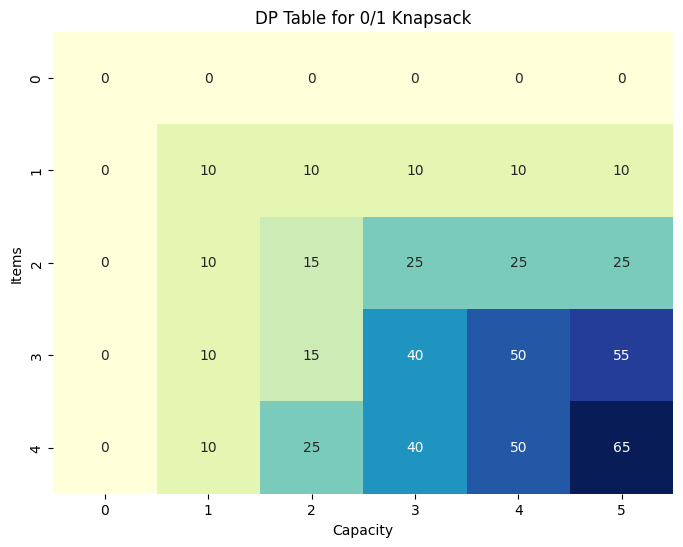

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def knapsack_dp(weights, values, capacity):
    n = len(weights)
    dp = np.zeros((n + 1, capacity + 1))

    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]

    return dp

# Example Usage
weights = [1, 2, 3, 2]
values = [10, 15, 40, 25]
capacity = 5

dp_table = knapsack_dp(weights, values, capacity)

# Visualize the DP Table
plt.figure(figsize=(8, 6))
sns.heatmap(dp_table, annot=True, fmt=".0f", cmap="YlGnBu", cbar=False)
plt.title("DP Table for 0/1 Knapsack")
plt.xlabel("Capacity")
plt.ylabel("Items")
plt.show()